# Imports

In [1]:
# pip install -r requirements.txt

In [10]:
import ray
import pandas as pd
import sklearn.model_selection

In [3]:
# Initialize Ray
if ray.is_initialized():
    ray.shutdown()
ray.init()

2025-01-04 20:17:45,677	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.12
Ray version:,2.7.0
Dashboard:,http://127.0.0.1:8265


In [4]:
ray.cluster_resources()

{'node:__internal_head__': 1.0,
 'CPU': 2.0,
 'object_store_memory': 4003570483.0,
 'node:172.28.0.12': 1.0,
 'memory': 8007140967.0,
 'accelerator_type:T4': 1.0,
 'GPU': 1.0}

# Data

## Data ingestion

In [8]:
df = pd.read_csv('/content/datasets/dataset.csv')

In [9]:
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


In [12]:
# Value counts
df.tag.value_counts()

,count
tag,
natural-language-processing,310
computer-vision,285
other,106
mlops,63


## Data splittig

In [14]:
# Split dataset
test_size = 0.2
train_df, val_df = sklearn.model_selection.train_test_split(df, stratify=df.tag, test_size=test_size, random_state=1234)

In [15]:
# Train value counts
train_df.tag.value_counts()

,count
tag,
natural-language-processing,248
computer-vision,228
other,85
mlops,50


In [16]:
# Validation (adjusted) value counts
val_df.tag.value_counts() * int((1-test_size) / test_size)

,count
tag,
natural-language-processing,248
computer-vision,228
other,84
mlops,52


## Exploratory Data Analysis (EDA)
Exploratory data analysis to understand the signals and nuances of our dataset. It's a cyclical process that can be done at various points of our development process (before/after labeling, preprocessing, etc.) depending on how well the problem is defined.

In [17]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

In [18]:
# Most common tags
all_tags = Counter(df.tag)
all_tags.most_common()

[('natural-language-processing', 310),
 ('computer-vision', 285),
 ('other', 106),
 ('mlops', 63)]

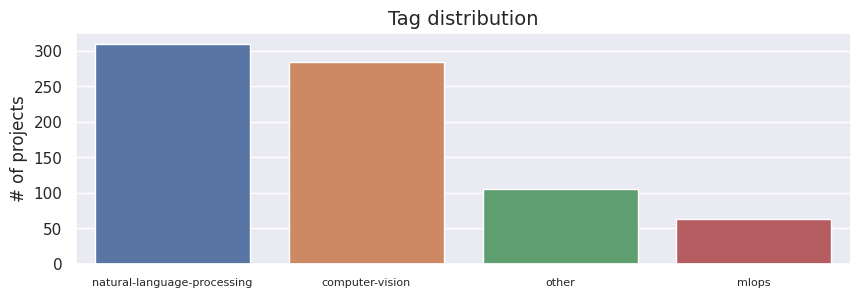

In [19]:
# Plot tag frequencies
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("# of projects", fontsize=12)
plt.show()

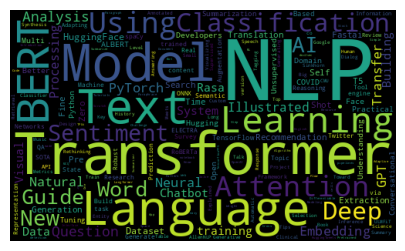

In [20]:
# Most frequent tokens for each tag
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset = df[df.tag==tag]
text = subset.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)